<a href="https://colab.research.google.com/github/Narita-1095305/AI-datascience-math/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E6%89%8B%E3%81%AB%E3%81%97%E3%81%A6%E3%81%BE%E3%81%9A%E8%A1%8C%E3%81%86%E3%81%93%E3%81%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1-1:データを読み込んでみよう**

In [2]:
#Colaboratory環境の設定
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/AI-datascience-math/chapter1

/content/drive/MyDrive/AI-datascience-math/chapter1


In [4]:
import pandas as pd
df_info = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df_info

,顧客ID,宿泊者名,プラン,金額
日時,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


**1-2:時系列データを可視化してみよう**

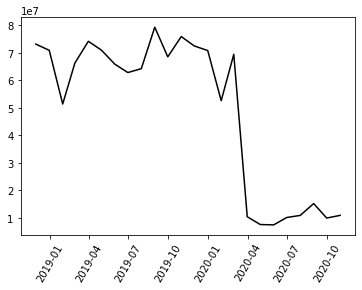

In [5]:
import matplotlib.pyplot as plt
plt.plot(df_info["金額"].resample('M').sum(),color="k")
plt.xticks(rotation=60)
plt.show()

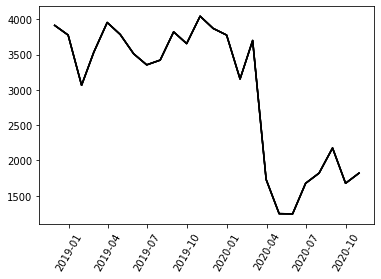

In [6]:
import matplotlib.pyplot as plt
plt.plot(df_info.resample('M').count(),color="k")
plt.xticks(rotation=60)
plt.show()

**1-3:平均値、中央値、最小値、最大値を出力してみよう**

In [7]:
x_mean = df_info['顧客ID'].value_counts().mean()
x_median = df_info['顧客ID'].value_counts().median()
x_min = df_info['顧客ID'].value_counts().min()
x_max = df_info['顧客ID'].value_counts().max()
print("平均値:",x_mean)
print("中央値:",x_median)
print("最小値:",x_min)
print("最大値:",x_max)

平均値: 13.073641997812613
中央値: 7.0
最小値: 1
最大値: 184


**1-4:分布のカタチを見てみよう**

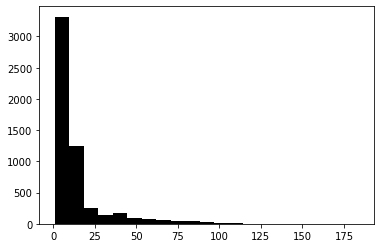

In [8]:
import matplotlib.pyplot as plt
x = df_info['顧客ID'].value_counts()
x_hist,t_hist,_ = plt.hist(x,21,color="k")
plt.show()

**1-5:分布の近似曲線を求めてみよう**

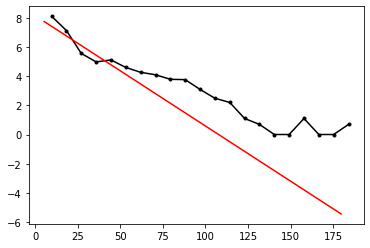

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#パラメータ設定
epsiron = 1
num = 15
#変数設定
weight = x_hist[1:num]
t = np.zeros(len(t_hist) - 1)
for i in range(len(t_hist) - 1):
  t[i] = (t_hist[i]+t_hist[i + 1]) / 2
#フィッテングパラメータの算出
a, b = np.polyfit(t[1:num], np.log(x_hist[1:num]), 1, w=weight)

#フィッティング曲線(直線)の描画
xt = np.zeros(len(t))
for i in range(len(t)):
  xt[i] = a * t[i] + b
plt.plot(t_hist[1:], np.log(x_hist+epsiron), marker=".", color="k")
plt.plot(t,xt,color="r")
plt.show()

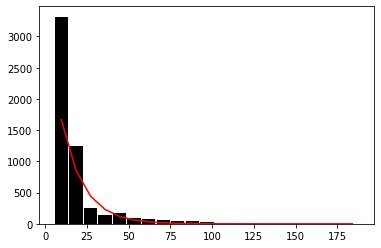

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

t = t_hist[1:]
xt = np.zeros(len(t))
for i in range(len(t)):
  xt[i] = math.exp(a*t[i]+b)

plt.bar(t_hist[1:], x_hist, width=8,color="k")
plt.plot(t,xt,color="r")
plt.show()

**1-6:プラン毎にデータを抽出してみよう**

In [11]:
print(df_info[df_info["プラン"]=="A"])

                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-01 00:12:22  111504    青山 零   A  15000
2018-11-01 00:18:26  114882    山岸 淳   A  15000
2018-11-01 00:20:47  110865   石田 和也   A  15000
2018-11-01 00:21:52  110069  山岸 聡太郎   A  15000
2018-11-01 15:02:07  111430   山田 明美   A  15000
...                     ...     ...  ..    ...
2020-10-31 22:14:38  110004   山岸 健一   A   3000
2020-10-31 23:38:51  110049   吉本 篤司   A   3000
2020-10-31 23:42:12  110127    喜嶋 浩   A   3000
2020-10-31 23:53:22  114657   鈴木 七夏   A   3000
2020-10-31 23:57:21  111407    鈴木 治   A   3000

[12954 rows x 4 columns]


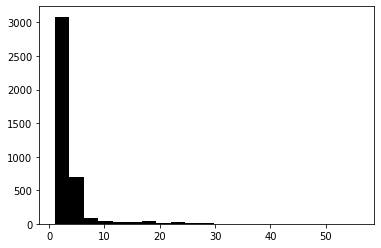

In [12]:
df_a = df_info[df_info["プラン"]=="A"]
x_a = df_a["顧客ID"].value_counts()
xa_hist,ta_hist,_ = plt.hist(x_a,21,color="k")
plt.show()

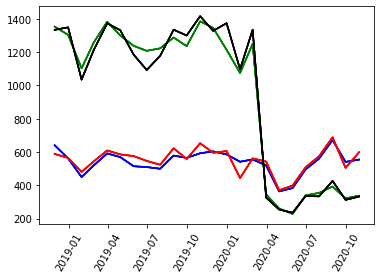

In [13]:
import matplotlib.pyplot as plt
plt.plot(df_info[df_info["プラン"]=="A"].resample('M').count(),color="b")
plt.plot(df_info[df_info["プラン"]=="B"].resample('M').count(),color="g")
plt.plot(df_info[df_info["プラン"]=="C"].resample('M').count(),color="r")
plt.plot(df_info[df_info["プラン"]=="D"].resample('M').count(),color="k")
plt.xticks(rotation=60)
plt.show()

**大口顧客の行動を分析してみよう**

In [14]:
for i_rank in range(10):
  id = df_info['顧客ID'].value_counts().index[i_rank]
  print(df_info[df_info['顧客ID']==id])

                       顧客ID   宿泊者名 プラン     金額
日時                                           
2018-11-03 19:03:50  110067  石田 知実   B  19000
2018-11-03 23:35:27  110067  石田 知実   B  19000
2018-11-07 19:15:07  110067  石田 知実   D  20000
2018-11-14 23:01:12  110067  石田 知実   B  19000
2018-11-20 17:58:54  110067  石田 知実   D  20000
...                     ...    ...  ..    ...
2020-10-19 22:53:41  110067  石田 知実   D   8000
2020-10-22 15:22:04  110067  石田 知実   A   3000
2020-10-22 18:45:23  110067  石田 知実   C   7000
2020-10-22 23:35:10  110067  石田 知実   C   7000
2020-10-31 19:03:46  110067  石田 知実   A   3000

[184 rows x 4 columns]
                       顧客ID    宿泊者名 プラン     金額
日時                                            
2018-11-02 21:26:41  110043  斉藤 あすか   A  15000
2018-11-05 16:32:52  110043  斉藤 あすか   B  19000
2018-11-17 19:46:04  110043  斉藤 あすか   B  19000
2018-11-23 16:11:16  110043  斉藤 あすか   C  19000
2018-11-24 22:38:48  110043  斉藤 あすか   B  19000
...                     ...     ...  ..    ...
20

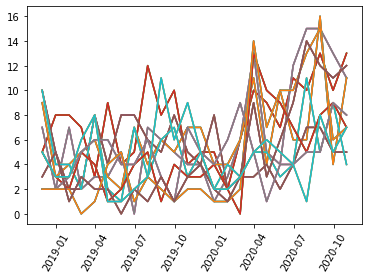

In [15]:
import matplotlib.pyplot as plt
for i_rank in range(10):
  id = df_info['顧客ID'].value_counts().index[i_rank]
  plt.plot(df_info[df_info['顧客ID']==id].resample('M').count())
  plt.xticks(rotation=60)
plt.show()

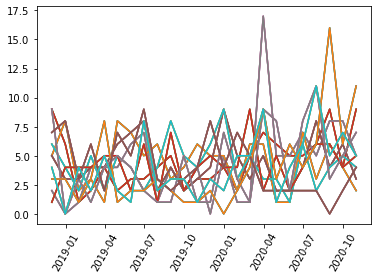

In [16]:
import matplotlib.pyplot as plt
for i_rank in range(10,20):
  id = df_info['顧客ID'].value_counts().index[i_rank]
  plt.plot(df_info[df_info['顧客ID']==id].resample('M').count())
  plt.xticks(rotation=60)
plt.show()

**感染症流行前後の顧客の行動を分析してみよう**

In [17]:
df_info = df_info.reset_index()

In [18]:
import datetime as dt
target_date = dt.datetime(2020,3,1)
df_info_pre = df_info[df_info["日時"] < target_date]
df_info_post = df_info[df_info["日時"] >= target_date]
print(df_info_pre)
print(len(df_info_pre)+len(df_info_post),len(df_info))

                       日時    顧客ID    宿泊者名 プラン     金額
0     2018-11-01 00:02:21  110034   若松 花子   B  19000
1     2018-11-01 00:03:10  112804  津田 美加子   D  20000
2     2018-11-01 00:06:19  110275  吉本 美加子   D  20000
3     2018-11-01 00:08:41  110169   坂本 直人   B  19000
4     2018-11-01 00:12:22  111504    青山 零   A  15000
...                   ...     ...     ...  ..    ...
58321 2020-02-29 23:49:54  111270  中津川 里佳   C  19000
58322 2020-02-29 23:52:14  112251   田中 真綾   B  19000
58323 2020-02-29 23:52:51  115804   井高 真綾   D  20000
58324 2020-02-29 23:53:09  112928   石田 修平   D  20000
58325 2020-02-29 23:55:28  110504   田辺 京助   B  19000

[58326 rows x 5 columns]
71722 71722


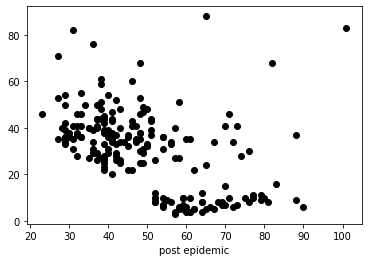

In [20]:
import numpy as np
import matplotlib.pyplot as plt
num = 200
count_pre_and_post = np.zeros((num,2))
for i_rank in range(num):
  id = df_info['顧客ID'].value_counts().index[i_rank]
  count_pre_and_post[i_rank][0] = int(df_info_pre[df_info_pre['顧客ID']==id].count()[0])
  count_pre_and_post[i_rank][1] = int(df_info_post[df_info_post['顧客ID']==id].count()[0])
plt.scatter(count_pre_and_post.T[0],count_pre_and_post.T[1], color="k")
#for i_rank in range(num):
#  id = df_info['顧客ID'].value_counts().index[i_rank]
#  text = str(id) + "(" + str(i_rank) + ")"
#  plt.text(count_pre_and_post[i_rank][0], count_pre_and_post[i_rank][1], text, color="k")
plt.xlabel("pre epidemic")
plt.xlabel("post epidemic")
plt.show()